<a href="https://colab.research.google.com/github/mish0410/aerofit-market-segmentation-analysis/blob/main/Aerofit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.

As a data analyst we wants to help its market research team to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. We would also want to investigate wheter there are difference across the product with respect to customer characteristics.

Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.
For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

In [ ]:
import math
from scipy.stats import norm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#importing the dataset
df = pd.read_csv(r'C:\Users\mishra.rk.1\Downloads\aerofit_treadmill.csv')

#print top 5 rows of data to check schema of dataset
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
#shape of data can help us understand number of rows and columns in data
print('Total rows and columns\n')
print(f"Rows = {df.shape[0]} \nColumns = {df.shape[1]}")

#it is important to check if data have null values to ensure that data analysis is not biased or skewed
print('\nnull values in dataset\n')
print(df.isnull().sum())

Total rows and columns

Rows = 180 
Columns = 9

null values in dataset

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64


In [ ]:
# checking data types is important to bifurcate data in categorical and numerical values to help with appropriate data analysis approach
print('\ndata type of each column\n')
print(df.dtypes)
print('\nduplicate rows in data\n')
print(df.duplicated().sum())


data type of each column

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

duplicate rows in data

0


# **Descriptive analysis**

In [ ]:
#in this step we will describe basic statistics of the dataset such as count, frequency, min, max, average, standard daviation
df.describe(include = 'all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


# **Outlier detection & continuous variable analysis**
Before starting any data analysis it is important if there are outliers in the data so that right data is included for analysis and the result is not biased due to outliers

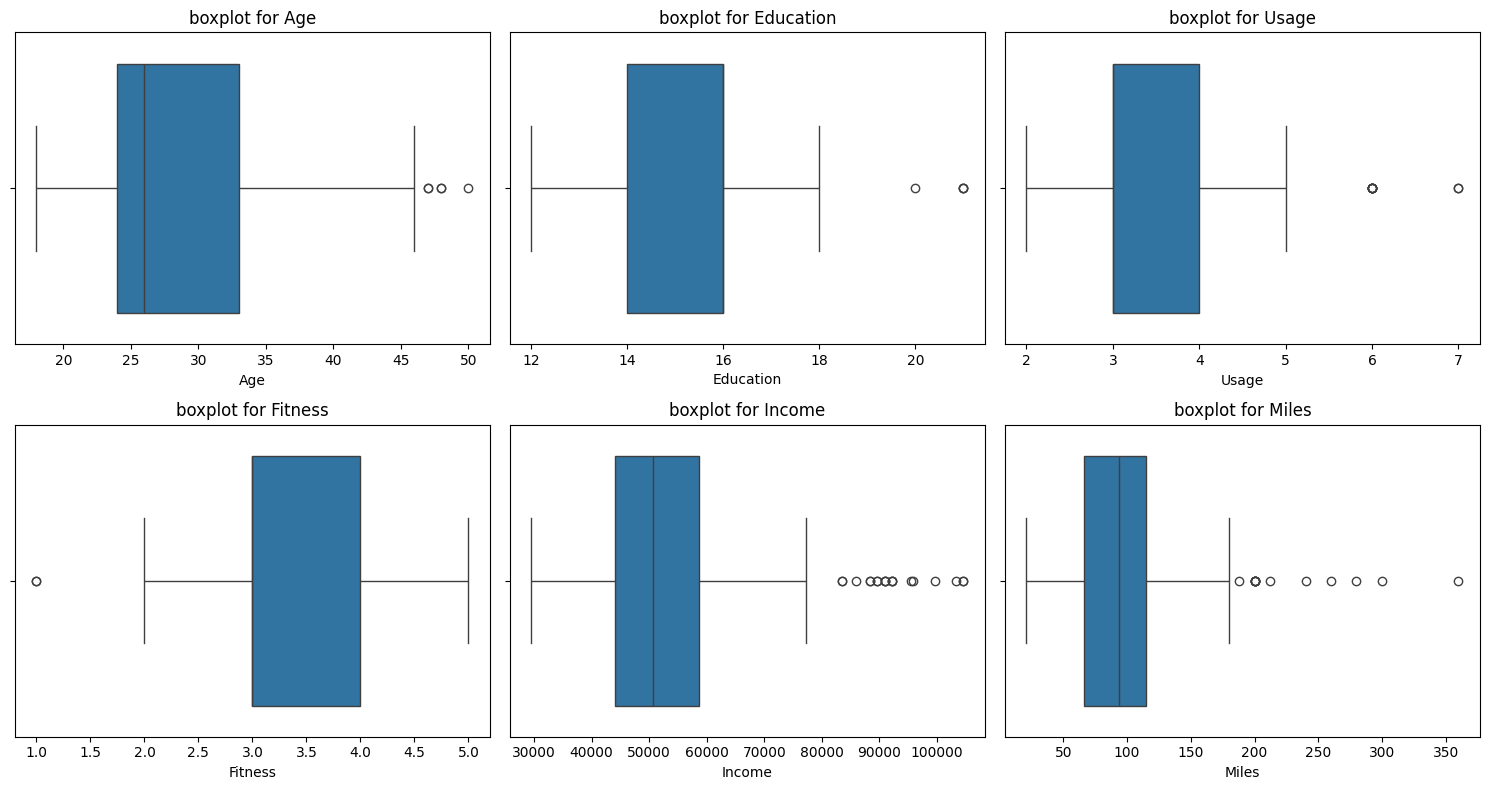

In [ ]:
continuous_vars = ['Age','Education','Usage', 'Fitness','Income','Miles']
plt.figure(figsize=(15,8))
for i,col in enumerate(continuous_vars):
    plt.subplot(2,3,i+1)
    sns.boxplot(x = df[col])
    plt.title(f'boxplot for {col}')
plt.tight_layout()
plt.show()

# Outlier analysis result
- very few people beyond the age of 46 seems to have bought these products
- very few people with more than 18 years of education have bought these products
- Out of all the people who have bought these products, very few use it more than 5 times a week
- out of all trademill buyers very few people have reported their shape as very poor
- only 6% of those earning more than 80000$ have bought the trademill
- very few of the customers have planned to walk more than ~180 miles in a week

# **categorization of data**

In [ ]:
# as its evident from the statistical analysis in above step, there are opportunities to categorize data in age buckets and income buckets to have a better understanding of consumer profiles
bins = [18,25,35,df['Age'].max()]
labels = ['18-25','25-35', '35+']
df['AgeBracket'] = pd.cut(df['Age'], bins = bins, labels = labels, right = False)

# creating a dynamic income group basis data distribution to analyse how income affects the choice of product
q25 = df['Income'].quantile(0.25)
q75 = df['Income'].quantile(0.75)
def income_slab(x):
    if x <= q25:
        return 'Low Income'
    elif q25<x<q75:
        return 'Middle Income'
    else:
        return 'High Income'
df['IncomeSlab'] = df['Income'].apply(income_slab)
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,AgeBracket,IncomeSlab
0,KP281,18,Male,14,Single,3,4,29562,112,18-25,Low Income
1,KP281,19,Male,15,Single,2,3,31836,75,18-25,Low Income
2,KP281,19,Female,14,Partnered,4,3,30699,66,18-25,Low Income
3,KP281,19,Male,12,Single,3,3,32973,85,18-25,Low Income
4,KP281,20,Male,13,Partnered,4,2,35247,47,18-25,Low Income
...,...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,35+,High Income
176,KP781,42,Male,18,Single,5,4,89641,200,35+,High Income
177,KP781,45,Male,16,Single,5,5,90886,160,35+,High Income
178,KP781,47,Male,18,Partnered,4,5,104581,120,35+,High Income


# **Distrbition of products**

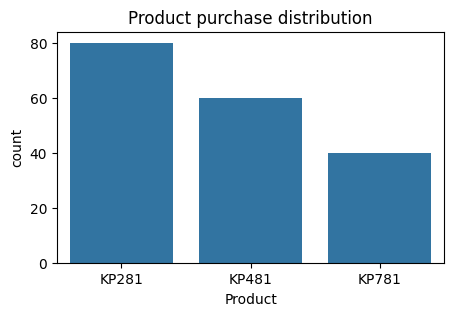


Marginal probability  of each product

Product
KP281    44.44%
KP481    33.33%
KP781    22.22%
Name: proportion, dtype: object


In [ ]:
# with below code we will plot a bar chart depicting number of units sold for each product type
plt.figure(figsize=(5,3))
sns.countplot(x = 'Product', data = df)
plt.title('Product purchase distribution')
plt.show()

#below code lines will help us to find percentage sales of each product code
print("\nMarginal probability  of each product\n")
print((df['Product'].value_counts(normalize= True)*100).round(2).astype(str)+'%')

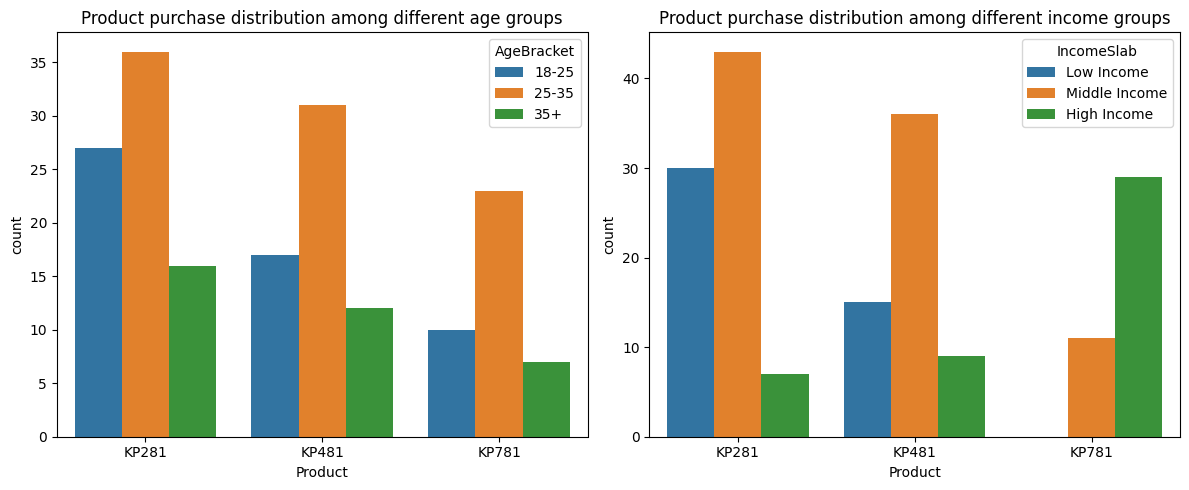

In [ ]:
# create subplots (2 rows, 1 column)
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# plot 1: Product vs AgeBracket
sns.countplot(x='Product', hue='AgeBracket', data=df, ax=axes[0])
axes[0].set_title('Product purchase distribution among different age groups')

# plot 2: Product vs IncomeSlab
sns.countplot(x='Product', hue='IncomeSlab', data=df, ax=axes[1])
axes[1].set_title('Product purchase distribution among different income groups')

plt.tight_layout()
plt.show()

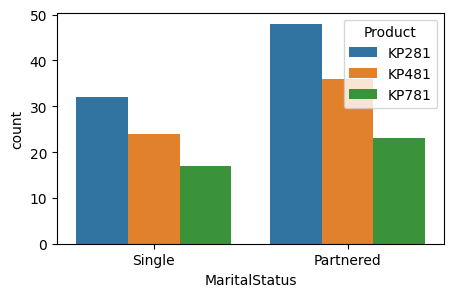

Marginal probability of buying based on Marital status MaritalStatus
Partnered    59.44%
Single       40.56%
Name: proportion, dtype: object


In [ ]:
#relation between marital status and purchase
plt.figure(figsize= (5,3))
sns.countplot(x = 'MaritalStatus', hue= 'Product', data = df)
plt.show()
print('Marginal probability of buying based on Marital status', (df['MaritalStatus'].value_counts(normalize= True)*100).round(2).astype(str)+'%')

# **categorization results**
- most customers of all 3 products are in the age range of 25-35
- most of the customer for low and mid tier treadmill are from middle income group followed by low income group however KP781 is mostly bought by high income individuals
- most of the buyers have partners and KP281 is preferred choice in both categories

# **Visual Analysis of relationship between product bought and different categorical data**

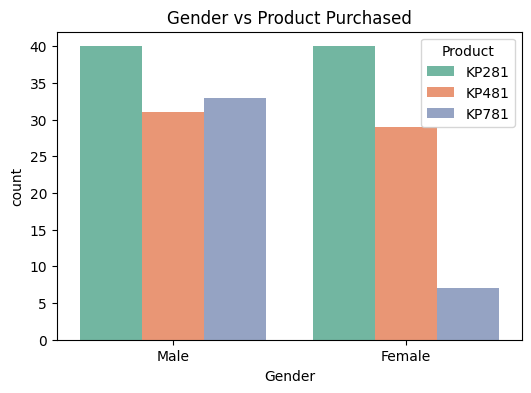

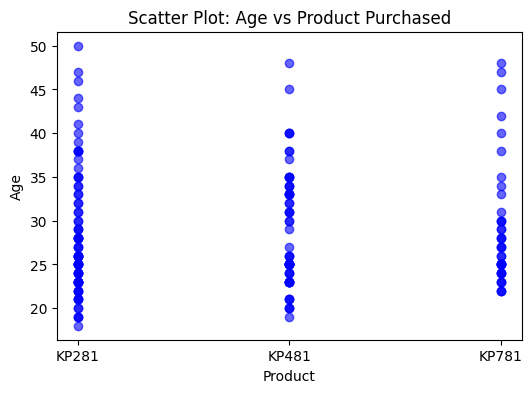

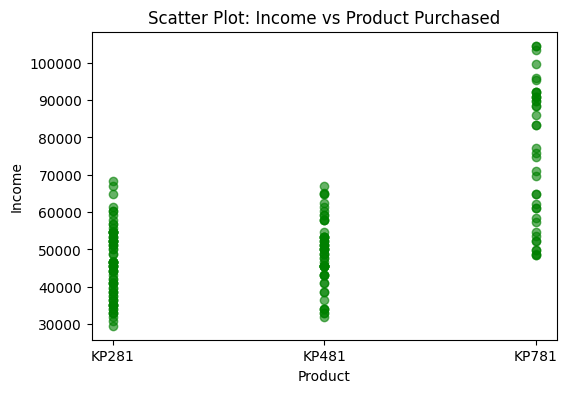

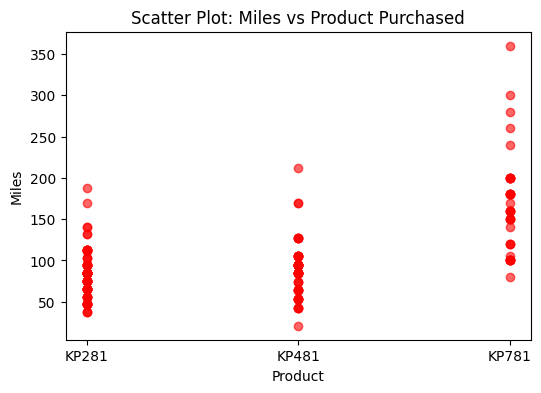

In [ ]:
# Relation of gender with product purchased
plt.figure(figsize=(6,4))
sns.countplot(x='Gender',hue='Product',data=df,palette='Set2')
plt.title('Gender vs Product Purchased')
plt.show()

# Age vs Product Purchased
plt.figure(figsize=(6,4))
plt.scatter(df["Product"], df["Age"], alpha=0.6, c="blue")
plt.title("Scatter Plot: Age vs Product Purchased")
plt.xlabel("Product")
plt.ylabel("Age")
plt.show()

# Income vs Product Purchased
plt.figure(figsize=(6,4))
plt.scatter(df['Product'],df['Income'],alpha=0.6,c='green')
plt.title("Scatter Plot: Income vs Product Purchased")
plt.xlabel("Product")
plt.ylabel("Income")
plt.show()

# Miles vs Product Purchased
plt.figure(figsize=(6,4))
plt.scatter(df["Product"], df["Miles"], alpha=0.6, c="red")
plt.title("Scatter Plot: Miles vs Product Purchased")
plt.xlabel("Product")
plt.ylabel("Miles")
plt.show()


# **Result of categorical relationship analysis**

- Gender vs Product → Males tend to prefer KP781, females are more evenly
spread across KP281/KP481.
- Age vs Product → KP281 is popular among all age groups, however mid range and premium product is mostly bought by customer below the age of 35.
- Income vs Product → all the buyers of KP281 are found to be earning <70000$ however majority of KP781 buyers are earning >70000$.
- Miles vs Product → buyers who preffered KP781 tends to be more active and have more miles ran in a week

# **Probabilities**

In [ ]:
# Joint probability
#crosstab between gender and product
gender_prod = pd.crosstab(df['Gender'],df['Product'], normalize= 'index')*100
print("conditional probability of purchasing a specific product given a perticular gender\n")
print(gender_prod.round(2))

#crosstab between Marital status and product
marital_stat_prod = pd.crosstab(df['MaritalStatus'],df['Product'], normalize= 'index')*100
print("\nconditional probability of purchasing a specific product given their marital status\n")
print(marital_stat_prod.round(2))

#age group and product preference
age_group_prod = pd.crosstab(df['AgeBracket'],df['Product'], normalize= 'index')*100
print("\nconditional probability of purchasing a specific product given their age group\n")
print(age_group_prod.round(2))

conditional probability of purchasing a specific product given a perticular gender

Product  KP281  KP481  KP781
Gender                      
Female   52.63  38.16   9.21
Male     38.46  29.81  31.73

conditional probability of purchasing a specific product given their marital status

Product        KP281  KP481  KP781
MaritalStatus                     
Partnered      44.86  33.64  21.50
Single         43.84  32.88  23.29

conditional probability of purchasing a specific product given their age group

Product     KP281  KP481  KP781
AgeBracket                     
18-25       50.00  31.48  18.52
25-35       40.00  34.44  25.56
35+         45.71  34.29  20.00


# **Correlation among different factors**

Correlation Matrix:

                 Age  Education     Usage   Fitness    Income     Miles
Age        1.000000   0.280496  0.015064  0.061105  0.513414  0.036618
Education  0.280496   1.000000  0.395155  0.410581  0.625827  0.307284
Usage      0.015064   0.395155  1.000000  0.668606  0.519537  0.759130
Fitness    0.061105   0.410581  0.668606  1.000000  0.535005  0.785702
Income     0.513414   0.625827  0.519537  0.535005  1.000000  0.543473
Miles      0.036618   0.307284  0.759130  0.785702  0.543473  1.000000


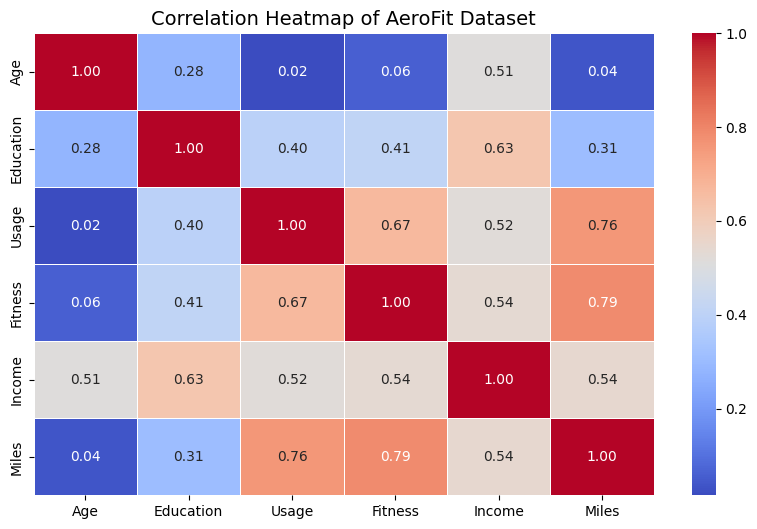

In [ ]:
#Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['int64', 'float64'])
# Correlation matrix
corr_matrix = numeric_df.corr()
print("Correlation Matrix:\n\n", corr_matrix)
# Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of AeroFit Dataset", fontsize=14)
plt.show()

# **Customer profiling**

In [ ]:
# to create customer profiles We’ll group by Product and summarize customer features:

profile = df.groupby("Product").agg({
    "Age": ["mean", "median"],
    "Gender": lambda x: x.value_counts().index[0],  # most common
    "Education": "mean",
    "MaritalStatus": lambda x: x.value_counts().index[0],
    "Usage": "mean",
    "Income": "mean",
    "Fitness": "mean",
    "Miles": "mean"
})
print(profile)


           Age          Gender  Education MaritalStatus     Usage     Income  \
          mean median <lambda>       mean      <lambda>      mean       mean   
Product                                                                        
KP281    28.55   26.0     Male  15.037500     Partnered  3.087500  46418.025   
KP481    28.90   26.0     Male  15.116667     Partnered  3.066667  48973.650   
KP781    29.10   27.0     Male  17.325000     Partnered  4.775000  75441.575   

        Fitness       Miles  
           mean        mean  
Product                      
KP281    2.9625   82.787500  
KP481    2.9000   87.933333  
KP781    4.6250  166.900000  


# **Recommendation for business**

**KP281 Marketing**
Target college students, and people who are not in a relationship
Position it as affordable & beginner-friendly.

**KP481 Marketing**
Target young working professionals who have started to earn now
Position it as a go to option for people who want more durability at best value


**KP781 Marketing**
Target mid-senior level working professionals or people with high income (>70000)
Position it as a premium treadmill with advanced features.

**Final Takeaway**
Segmentation is clear:
KP281 → Budget-conscious, begineers
KP481 → Mid-income, health conscious
KP781 → Premium, high-income fitness enthusiasts
AeroFit can tailor marketing & sales strategies by customer profile to increase conversionand customer satisfaction.